# Announcements
- Problem Set 6 will be on finite difference methods, due Nov 2 (to be posted on D2L).
- __Outlook__: Next week, we'll move on to Monte Carlo Markov Chain methods.

*Note:  The presentation below largely follows part I in "Finite Difference Methods for Ordinary and Partial Differential Equations" by LeVeque (SIAM, 2007).*

# The Heat Equation
Numerical solutions to partial differential equations (PDEs) are a large subfield of applied math, and we won't be able to cover a full survey in this course. Today, we'll solve the heat equation
$$
\partial_{t}u(\vec x,t) = \alpha \vec \nabla^2 u(\vec x,t)\,,
$$
which describes how a quantity $u$ (such as heat) diffuses through a medium, and
with $\alpha$ a positive constant, called _diffusivity_ of the medium. The heat equation is among the most widely studied PDEs, and a prototype for parabolic PDEs.

Today we will numerically solve an example in 1D, applying the finite difference method from Lecture 23 and 24 for the spatial solution, combined with a forward Euler step for the time solution.

## Example Problem
Let consider the 1D heat equation on a wire with extend $x\in[0,1]$,
\begin{equation}
    \partial_{t}u = \partial^2_{x}u , \quad 0 < x < 1, \quad t > 0 \\
\end{equation}
with boundary conditions
\begin{equation}
    u(0,t) = 0, \quad {u}(1,t) = 0\,,\\
\end{equation}
which correspond to endpoints held at constant temperature, and inital temperature distribution
\begin{equation}
    u(x, 0) = 10\sin(\pi x)\,.
\end{equation}


# Discretization
Lecture 23 introduced the _Finite Difference_ method and we used it to solve a boundary value problem with Dirichlet conditions as a linear system. 

Let's use the subscript $i$ to indicate the spatial discretization, and subscript $J$ for the time discretization, so that $U_{i,J} = u(x_i,t_J)$.
Today we will incorporate the Dirichlet conditions as ghost cells, $U_{0,J}$ and $U_{N+1,J}$, corresponding to the boundary points. 

Then the spatial discretization (at one slice in time) becomes
$$
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        \Delta x^2 & 0  \\
        1 & -2 & 1 \\
          &  1 & -2 & 1 \\
          &    & \ddots & \ddots & \ddots \\
          &    &        &      1 &     -2 & 1 \\
          &    &        &        &      1 & -2 & 1 \\
          &    &        &        &        &  0 & \Delta x^2
    \end{bmatrix} \quad \quad U_J = \begin{bmatrix}
        U_{0,J} \\ U_{1,J} \\ \vdots \\ U_{N,J} \\ U_{N+1,J}
    \end{bmatrix} \quad \quad b_J = \begin{bmatrix}
        u(0,t_J)=0 \\ f(x_1,t_J) \\ \vdots \\ f(x_{N},t_J) \\ u(1,t_J) =0\,.
    \end{bmatrix}  
$$
_Note that $A$ is time independent!_

The next step is to discretize in time
$$
\frac{U_{i,J+1} -U_{i,J}}{\Delta t} = U^{\prime\prime}_{i,J} = \frac{U_{i-1,J}-2U_{i,J}+U_{i+1,j}}{\Delta x^2}\,,
$$

<span style="color:blue"> **Solve today's Example Problem via the construction of a linear system of equations and time stepping.**</span>

<span style="color:blue"> Your expression for $U_{i,J+1}$ in terms of elements of $U_J$: </span>

$$U_{i,J+1} = U_{i,J} +\frac{\Delta t}{\Delta x^2}\left(U_{i-1,J}-2U_{i,J}+U_{i+1,j}\right)$$


_The code below is adapted from Lecture 23. The missing parts need to be adapted to today's problem, but you may find looking back at Lecture 23 helpful._

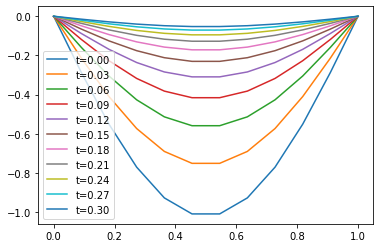

In [17]:
import numpy
import matplotlib.pyplot as plt
# Problem setup
f_t0 = lambda x: 10.*numpy.sin(numpy.pi*x)
#spatial discretization
a = 0.0
b = 1.0
u_a = 0.0
u_b = 0.0

# Spatial Discretization
N_x = 10
#keep boundary points
x = numpy.linspace(a, b, N_x + 2)
delta_x = (b - a) / (N_x + 1)

#time discretization
t_0 = 0
t_final = 0.3
N_t = 100
delta_t = (t_final-t_0)/(N_t+1)

# Construct matrix A 
A = numpy.zeros((N_x + 2, N_x + 2))
diagonal = numpy.ones(N_x + 2) / delta_x**2
A += numpy.diag(diagonal * -2.0, 0)
A += numpy.diag(diagonal[:-1], 1)
A += numpy.diag(diagonal[:-1], -1)

# Now, add boundary conditions for ghost cells to A
#left boundary
A[0,1] = 0
A[0,0] = 1
A[-1,-2] = 0
A[-1,-1] =1
# Construct RHS - without boundary conditions
b = f_t0(x)
# add boundary conditions to b
b[0] = u_a
b[-1] = u_b

#U[J,:] will contain solution at time J
U = numpy.empty((N_t+2,N_x + 2))
#spatial solution
U[0,:] = numpy.linalg.solve(A, b)

#now do time iteration
for J in range(0,N_t+1):
    U[J,0] = 0
    U[J,-1] = 0 
    #boundary conditions
    for i in range (1,N_x+1):
        U[J+1,i] = U[J,i] +delta_t/delta_x**2*(U[J,i-1]-2*U[J,i]+U[J,i+1])


for i in range(0,N_t+2,10):
    plt.plot(x,U[i,:],label ="t=%.2f"%(i*delta_t))
plt.legend()